# Coverage of heuristics

In [1]:
import blocksci

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import datetime

In [4]:
import utils

In [5]:
sns.set_theme(style="ticks")

In [6]:
plot_args = {"ylim":(0, 1.05), "xlim": (datetime.datetime(2011, 1, 1), None), "figsize": (8, 5)}

In [7]:
import collections
import random

In [8]:
chain = blocksci.Blockchain(utils.blocksci_config())

In [18]:
my_cm = blocksci.cluster.ClusterManager(utils.latest_clustering(), chain)

In [9]:
all_other = blocksci.GroundTruth(utils.remaining_txes(), chain)

In [10]:
def get_change_outputs(heuristic):
    unique_change_heuristic = heuristic.unique_change
    return all_other.transactions().where(lambda tx: unique_change_heuristic(tx).size == 1).size

In [11]:
total_tx_count = all_other.transactions().size

In [12]:
total_tx_count_per_year = all_other.transactions().group_by(lambda tx: tx.block.time.year, lambda txes: txes.size)

In [13]:
_temp = all_other.transactions().block.time
total_tx_count_per_month = pd.Series(_temp, index=_temp).resample("1M").count()
del _temp

In [14]:
def print_share(c):
    print(round(c / total_tx_count, 6))

In [15]:
def get_change_outputs_grouped_by_year(heuristic):
    unique_change_heuristic = heuristic.unique_change
    return all_other.transactions().where(lambda tx: unique_change_heuristic(tx).size == 1).block.time

In [16]:
def print_share_over_time(data, filename=None):
    ds = pd.Series(data, index=data).resample("1M").count().div(total_tx_count_per_month)
    ax = ds.plot(title=filename)
    ax.set_ylim(0, 1)

### Optimal Change

In [17]:
optimal_change_heuristic = blocksci.heuristics.change.optimal_change
optimal_change_filled = get_change_outputs(optimal_change_heuristic)

In [18]:
print_share(optimal_change_filled)

0.133055


In [19]:
optimal_change_over_time = get_change_outputs_grouped_by_year(optimal_change_heuristic)

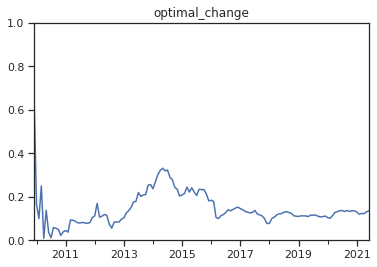

In [20]:
print_share_over_time(optimal_change_over_time, filename="optimal_change")

### Optimal Change v2

In [21]:
optimal_change_with_fee_heuristic = blocksci.heuristics.change.optimal_change_with_fee
optimal_change_with_fee_filled = get_change_outputs(optimal_change_with_fee_heuristic)

In [22]:
print_share(optimal_change_with_fee_filled)

0.095639


In [23]:
optimal_change_with_fee_over_time = get_change_outputs_grouped_by_year(optimal_change_with_fee_heuristic)

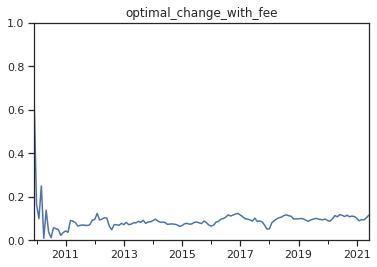

In [24]:
print_share_over_time(optimal_change_with_fee_over_time, filename="optimal_change_with_fee")

### Address type

In [25]:
addresstype_change_heuristic = blocksci.heuristics.change.address_type
addresstype_change_filled = get_change_outputs(addresstype_change_heuristic)

In [26]:
print_share(addresstype_change_filled)

0.368654


In [27]:
addresstype_change_over_time = get_change_outputs_grouped_by_year(addresstype_change_heuristic)

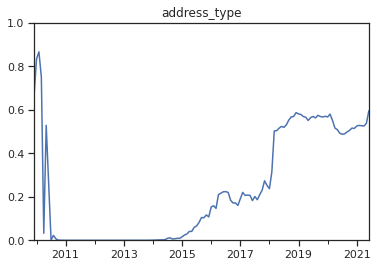

In [28]:
print_share_over_time(addresstype_change_over_time, filename="address_type")

### Shadow

In [29]:
shadow_heuristic = blocksci.heuristics.change.client_change_address_behavior
shadow_filled = get_change_outputs(shadow_heuristic)

In [30]:
print_share(shadow_filled)

0.476663


In [31]:
shadow_over_time = get_change_outputs_grouped_by_year(shadow_heuristic)

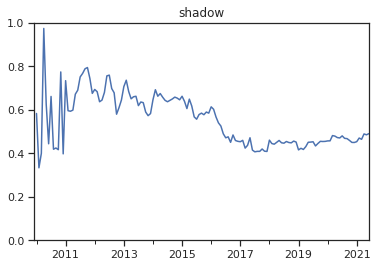

In [32]:
print_share_over_time(shadow_over_time, filename="shadow")

### Meiklejohn

In [33]:
meiklejohn_heuristic = blocksci.heuristics.change.meiklejohn
meikljohn_filled = get_change_outputs(meiklejohn_heuristic)

In [34]:
print_share(meikljohn_filled)

0.476663


In [35]:
meiklejohn_over_time = get_change_outputs_grouped_by_year(meiklejohn_heuristic)

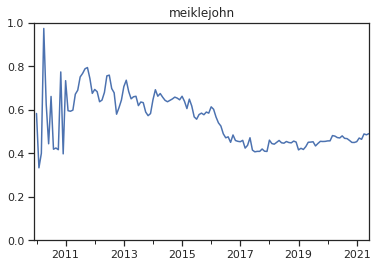

In [36]:
print_share_over_time(meiklejohn_over_time, filename="meiklejohn")

### Meiklejohn Global

In [37]:
meiklejohn_global_heuristic = blocksci.heuristics.change.meiklejohn_global
meikljohn_global_filled = get_change_outputs(meiklejohn_global_heuristic)

In [38]:
print_share(meikljohn_global_filled)

0.544075


In [39]:
meiklejohn_global_over_time = get_change_outputs_grouped_by_year(meiklejohn_global_heuristic)

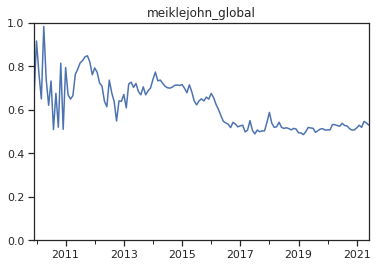

In [40]:
print_share_over_time(meiklejohn_global_over_time, filename="meiklejohn_global")

#### Power of ten output value

In [41]:
def get_poweroften_change(digits):
    power_often_heuristic = blocksci.heuristics.change.power_of_ten_value(digits)
    return get_change_outputs(power_often_heuristic)

In [42]:
def get_poweroften_change_over_time(digits):
    power_often_heuristic = blocksci.heuristics.change.power_of_ten_value(digits)
    power_of_ten_over_time = get_change_outputs_grouped_by_year(power_often_heuristic)
    print_share_over_time(power_of_ten_over_time, filename="power_of_ten_{}".format(digits))
    return power_of_ten_over_time

In [131]:
poweroften_filled_1 = get_poweroften_change(1)

In [132]:
print_share(poweroften_filled_1)

0.44261


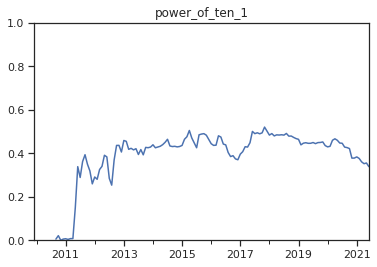

In [133]:
poweroften_1_over_time = get_poweroften_change_over_time(1)

In [43]:
poweroften_filled_2 = get_poweroften_change(2)

In [44]:
print_share(poweroften_filled_2)

0.383023


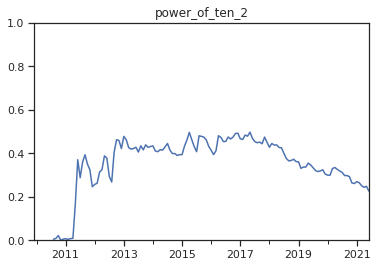

In [45]:
poweroften_2_over_time = get_poweroften_change_over_time(2)

In [46]:
poweroften_filled_3 = get_poweroften_change(3)

In [47]:
print_share(poweroften_filled_3)

0.310695


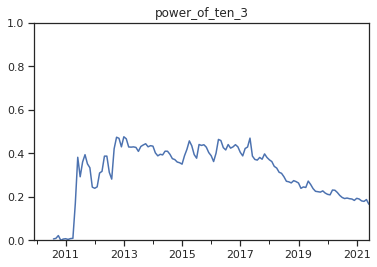

In [48]:
poweroften_3_over_time = get_poweroften_change_over_time(3)

In [49]:
poweroften_filled_4 = get_poweroften_change(4)

In [50]:
print_share(poweroften_filled_4)

0.253267


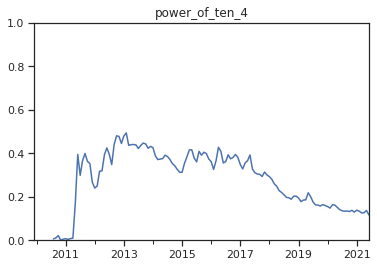

In [51]:
poweroften_4_over_time = get_poweroften_change_over_time(4)

In [52]:
poweroften_filled_5 = get_poweroften_change(5)

In [53]:
print_share(poweroften_filled_5)

0.172828


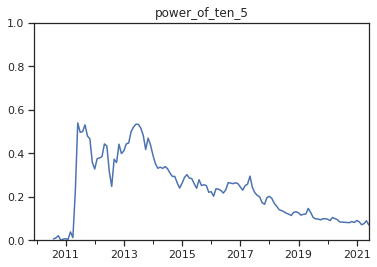

In [54]:
poweroften_5_over_time = get_poweroften_change_over_time(5)

In [55]:
poweroften_filled_6 = get_poweroften_change(6)

In [56]:
print_share(poweroften_filled_6)

0.103664


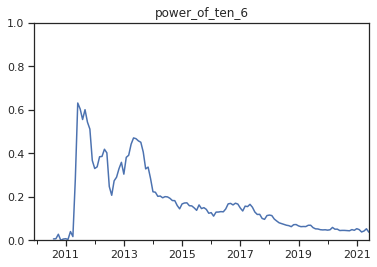

In [57]:
poweroften_6_over_time = get_poweroften_change_over_time(6)

In [58]:
poweroften_filled_7 = get_poweroften_change(7)

In [59]:
print_share(poweroften_filled_7)

0.048142


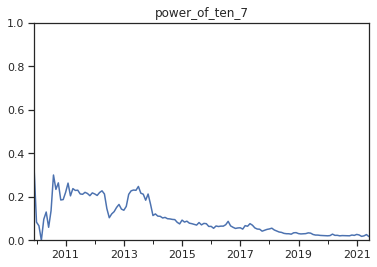

In [60]:
poweroften_7_over_time = get_poweroften_change_over_time(7)

### Fingerprint

In [61]:
fp = blocksci.Fingerprinter(utils.latest_fingerprints(), chain)

### Output count

In [62]:
outputcount_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.OUTPUT_COUNT))
outputcount_filled = get_change_outputs(outputcount_heuristic)

In [63]:
print_share(outputcount_filled)

0.444722


In [64]:
outputcount_over_time = get_change_outputs_grouped_by_year(outputcount_heuristic)

In [65]:
outputcount_over_time

array(['2009-12-05T18:16:34.000000000', '2010-01-21T07:44:35.000000000',
       '2010-01-21T12:52:06.000000000', ...,
       '2021-06-30T22:44:04.000000000', '2021-06-30T22:44:04.000000000',
       '2021-06-30T22:44:04.000000000'], dtype='datetime64[ns]')

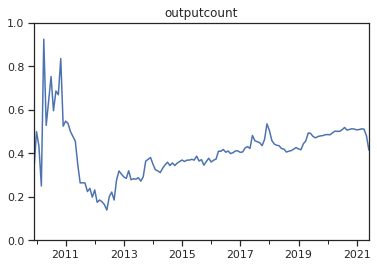

In [66]:
print_share_over_time(outputcount_over_time, filename="outputcount")

### Input and Output count

In [67]:
inoutcount_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask([utils.Fingerprint.OUTPUT_COUNT, utils.Fingerprint.INPUT_COUNT]))
inoutcount_filled = get_change_outputs(inoutcount_heuristic)

In [68]:
print_share(inoutcount_filled)

0.568453


In [69]:
inoutcount_over_time = get_change_outputs_grouped_by_year(inoutcount_heuristic)

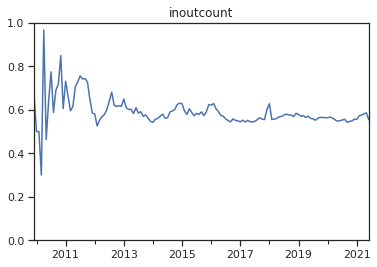

In [70]:
print_share_over_time(inoutcount_over_time, filename="inoutcount")

### Version number

In [71]:
version_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.VERSION_2))
version_filled = get_change_outputs(version_heuristic)

In [72]:
print_share(version_filled)

0.319966


In [73]:
version_over_time = get_change_outputs_grouped_by_year(version_heuristic)

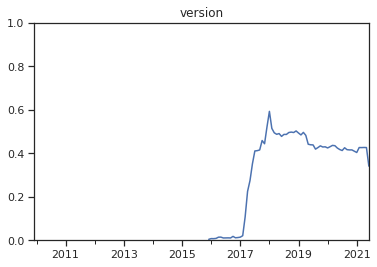

In [74]:
print_share_over_time(version_over_time, filename="version")

### Locktime

In [75]:
locktime_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask([utils.Fingerprint.LOCKTIME_HEIGHT, utils.Fingerprint.LOCKTIME_TIME]))
locktime_filled = get_change_outputs(locktime_heuristic)

In [76]:
print_share(locktime_filled)

0.362681


In [77]:
locktime_over_time = get_change_outputs_grouped_by_year(locktime_heuristic)

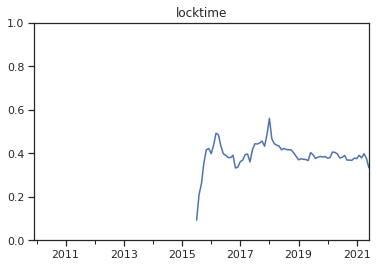

In [78]:
print_share_over_time(locktime_over_time, filename="locktime")

### RBF

In [79]:
rbf_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.RBF))
rbf_filled = get_change_outputs(rbf_heuristic)

In [80]:
print_share(rbf_filled)

0.114247


In [81]:
rbf_over_time = get_change_outputs_grouped_by_year(rbf_heuristic)

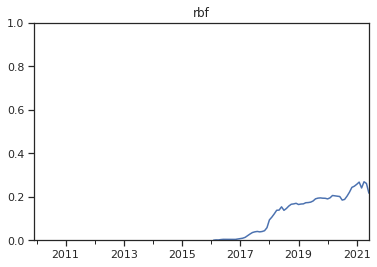

In [82]:
print_share_over_time(rbf_over_time, filename="rbf")

### Segwit

In [83]:
segwit_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SEGWIT))
segwit_filled = get_change_outputs(segwit_heuristic)

In [84]:
print_share(segwit_filled)

0.260257


In [85]:
segwit_over_time = get_change_outputs_grouped_by_year(segwit_heuristic)

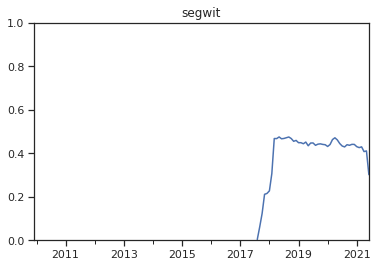

In [86]:
print_share_over_time(segwit_over_time, filename="segwit")

### Segwit-compatible

In [87]:
possible_segwit_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SEGWIT_COMPATIBLE))
possible_segwit_filled = get_change_outputs(possible_segwit_heuristic)

In [88]:
print_share(possible_segwit_filled)

0.027523


In [89]:
possible_segwit_over_time = get_change_outputs_grouped_by_year(possible_segwit_heuristic)

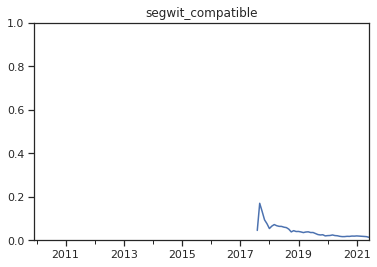

In [90]:
print_share_over_time(possible_segwit_over_time, filename="segwit_compatible")

### Ordered inputs & outputs

In [91]:
ordered_inouts_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SORTED_INOUTS))
ordered_inouts_filled = get_change_outputs(ordered_inouts_heuristic)

In [92]:
print_share(ordered_inouts_filled)

0.442837


In [93]:
ordered_inouts_over_time = get_change_outputs_grouped_by_year(ordered_inouts_heuristic)

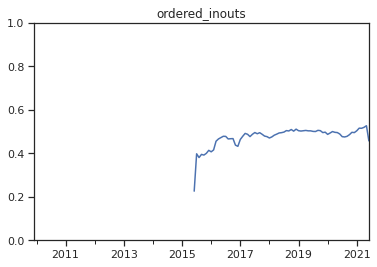

In [94]:
print_share_over_time(ordered_inouts_over_time, filename="ordered_inouts")

### Zeroconf

In [95]:
zeroconf_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.ZEROCONF))
zeroconf_filled = get_change_outputs(zeroconf_heuristic)

In [96]:
print_share(zeroconf_filled)

0.214499


In [97]:
zeroconf_over_time = get_change_outputs_grouped_by_year(zeroconf_heuristic)

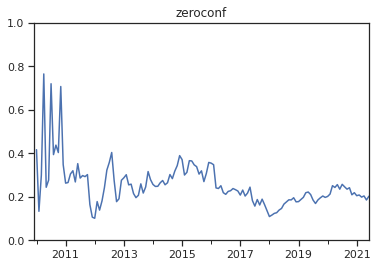

In [98]:
print_share_over_time(zeroconf_over_time, filename="zeroconf")

### Absolute fee

In [99]:
absolute_fee_heuristic = blocksci.heuristics.change.fixed_fee
absolute_fee_filled = get_change_outputs(absolute_fee_heuristic)

In [100]:
print_share(absolute_fee_filled)

0.305234


In [101]:
absolute_fee_over_time = get_change_outputs_grouped_by_year(absolute_fee_heuristic)

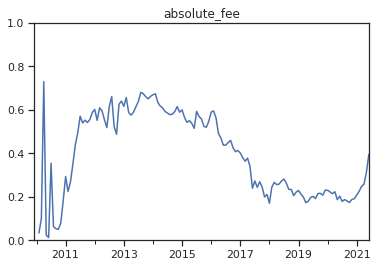

In [102]:
print_share_over_time(absolute_fee_over_time, filename="absolute_fee")

### Relative fee

In [103]:
relative_fee_heuristic = blocksci.heuristics.change.fixed_fee_per_byte
relative_fee_filled = get_change_outputs(relative_fee_heuristic)

In [104]:
print_share(relative_fee_filled)

0.203914


In [105]:
relative_fee_over_time = get_change_outputs_grouped_by_year(relative_fee_heuristic)

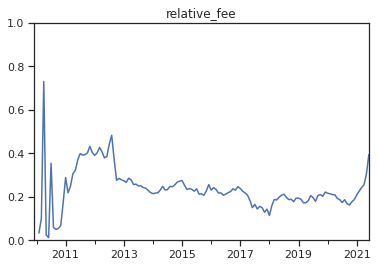

In [106]:
print_share_over_time(relative_fee_over_time, filename="relative_fee")

### Multisig Fingerprint

In [107]:
multisig_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.MULTISIG))
multisig_filled = get_change_outputs(multisig_heuristic)

In [108]:
print_share(multisig_filled)

0.153911


In [109]:
multisig_over_time = get_change_outputs_grouped_by_year(multisig_heuristic)

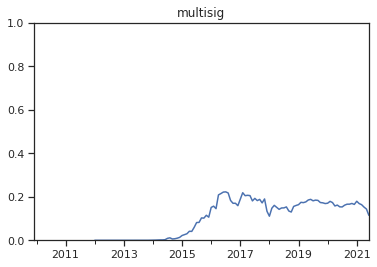

In [110]:
print_share_over_time(multisig_over_time, filename="multisig")

### Address Type Fingerprint

#### P2PKH

In [111]:
p2pkh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2PKH))
p2pkh_filled = get_change_outputs(p2pkh_heuristic)

In [112]:
print_share(p2pkh_filled)

0.311971


In [113]:
p2pkh_over_time = get_change_outputs_grouped_by_year(p2pkh_heuristic)

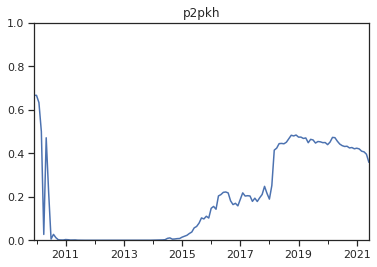

In [114]:
print_share_over_time(p2pkh_over_time, filename="p2pkh")

#### P2SH

In [115]:
p2sh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2SH))
p2sh_filled = get_change_outputs(p2sh_heuristic)

In [116]:
print_share(p2sh_filled)

0.334274


In [117]:
p2sh_over_time = get_change_outputs_grouped_by_year(p2sh_heuristic)

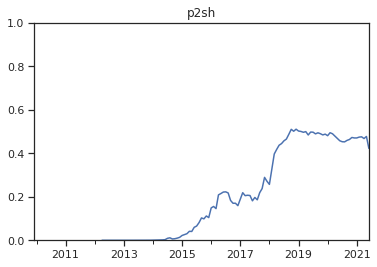

In [118]:
print_share_over_time(p2sh_over_time, filename="p2sh")

#### P2WPKH

In [119]:
p2wpkh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2WPKH))
p2wpkh_filled = get_change_outputs(p2wpkh_heuristic)

In [120]:
print_share(p2wpkh_filled)

0.255838


In [121]:
p2wpkh_over_time = get_change_outputs_grouped_by_year(p2wpkh_heuristic)

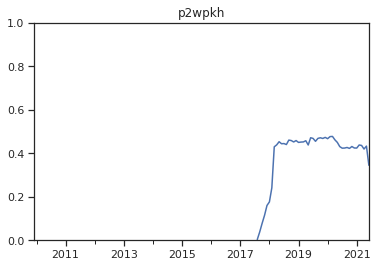

In [122]:
print_share_over_time(p2wpkh_over_time, filename="p2wpkh")

#### P2WSH

In [123]:
p2wsh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2WSH))
p2wsh_filled = get_change_outputs(p2wsh_heuristic)

In [124]:
print_share(p2wsh_filled)

0.08242


In [125]:
p2wsh_over_time = get_change_outputs_grouped_by_year(p2wsh_heuristic)

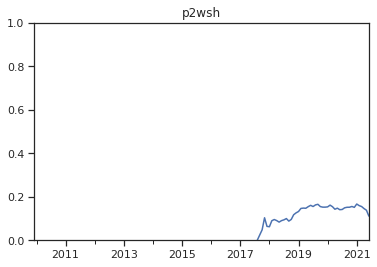

In [126]:
print_share_over_time(p2wsh_over_time, filename="p2wsh")

#### All address types

In [127]:
ADDRESS_FP2 = [utils.Fingerprint.MULTISIG, utils.Fingerprint.P2PKH, utils.Fingerprint.P2SH, utils.Fingerprint.P2WPKH, utils.Fingerprint.P2WSH, utils.Fingerprint.ADDRESS_OTHER]
addresstype2_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(ADDRESS_FP2))
addresstype2_filled = get_change_outputs(addresstype2_heuristic)

In [128]:
print_share(addresstype2_filled)

0.391835


In [129]:
addresstype2_over_time = get_change_outputs_grouped_by_year(addresstype2_heuristic)

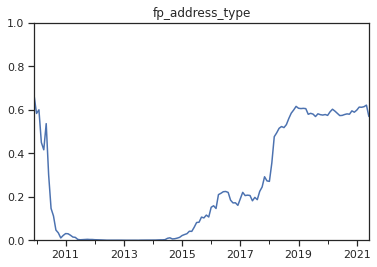

In [130]:
print_share_over_time(addresstype2_over_time, filename="fp_address_type")

### Two-Hops

In [19]:
two_hops_heuristic = blocksci.heuristics.change.two_hops(my_cm)
two_hops_filled = get_change_outputs(two_hops_heuristic)

In [20]:
print_share(two_hops_filled)

0.029973


In [21]:
two_hops_over_time = get_change_outputs_grouped_by_year(two_hops_heuristic)

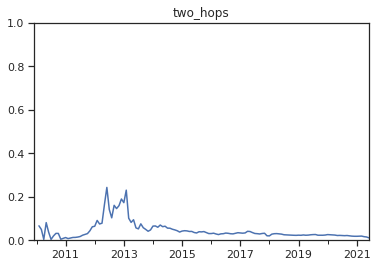

In [22]:
print_share_over_time(two_hops_over_time, filename="two_hops")